<a href="https://colab.research.google.com/github/Qind1609/ImgProcessing-Pytorch-CNN/blob/main/Image_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nguyễn Lê Hải Nguyên - 1710207 - BTL

Được thực hiện trên Google Colab

Đường link xem file trực tiếp: 
Google Colab: https://colab.research.google.com/drive/1Gef-kDaNDvzGJl93HeprFbhwUqvdfErZ?usp=sharing

G

#Canny Edge detector

**Mount Drive**

Mount colab với google drive để lấy ảnh vào chương trình

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


**Import Packages**

Import các package cần sử dụng trong chương trình.

Sử dụng cv2 - opencv để đọc ảnh vào.

Sử dụng numpy để thao tác phép toán

Sử dụng Matplotlib để xuất ảnh lên jupyter notebook

In [2]:
from google.colab.patches import cv2_imshow
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2

#kiểm tra version opencv 
cv2.__version__

'4.1.2'

**Input an image** 

Đọc ảnh vào chương trình bằng lệnh cv2.imread ,lưu trong biến image

In [3]:
folder_dir = r"/content/drive/MyDrive/T.A/image"                                #dẫn đường dẫn folder chứa ảnh trên drive 
print("My image: {} images".format(len(os.listdir(folder_dir))))                #in số ảnh trong folder

My image: 10 images


(332, 480, 3)


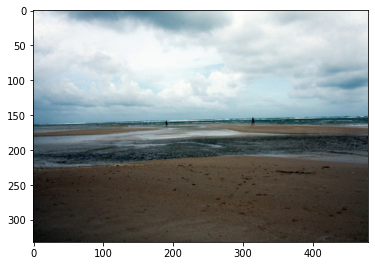

In [111]:
# Đọc image vào chương trình 
image = cv2.imread(os.path.join(folder_dir, "sea-thai.jpg"))

# Đổi format ảnh từ BGR sang RGB do opencv mặc định lưu ảnh đọc vào ở dạng BGR
image_1 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# xem size của ảnh
print(image.shape)

# show ảnh
plt.imshow(image_1)


**Display 3 channel**

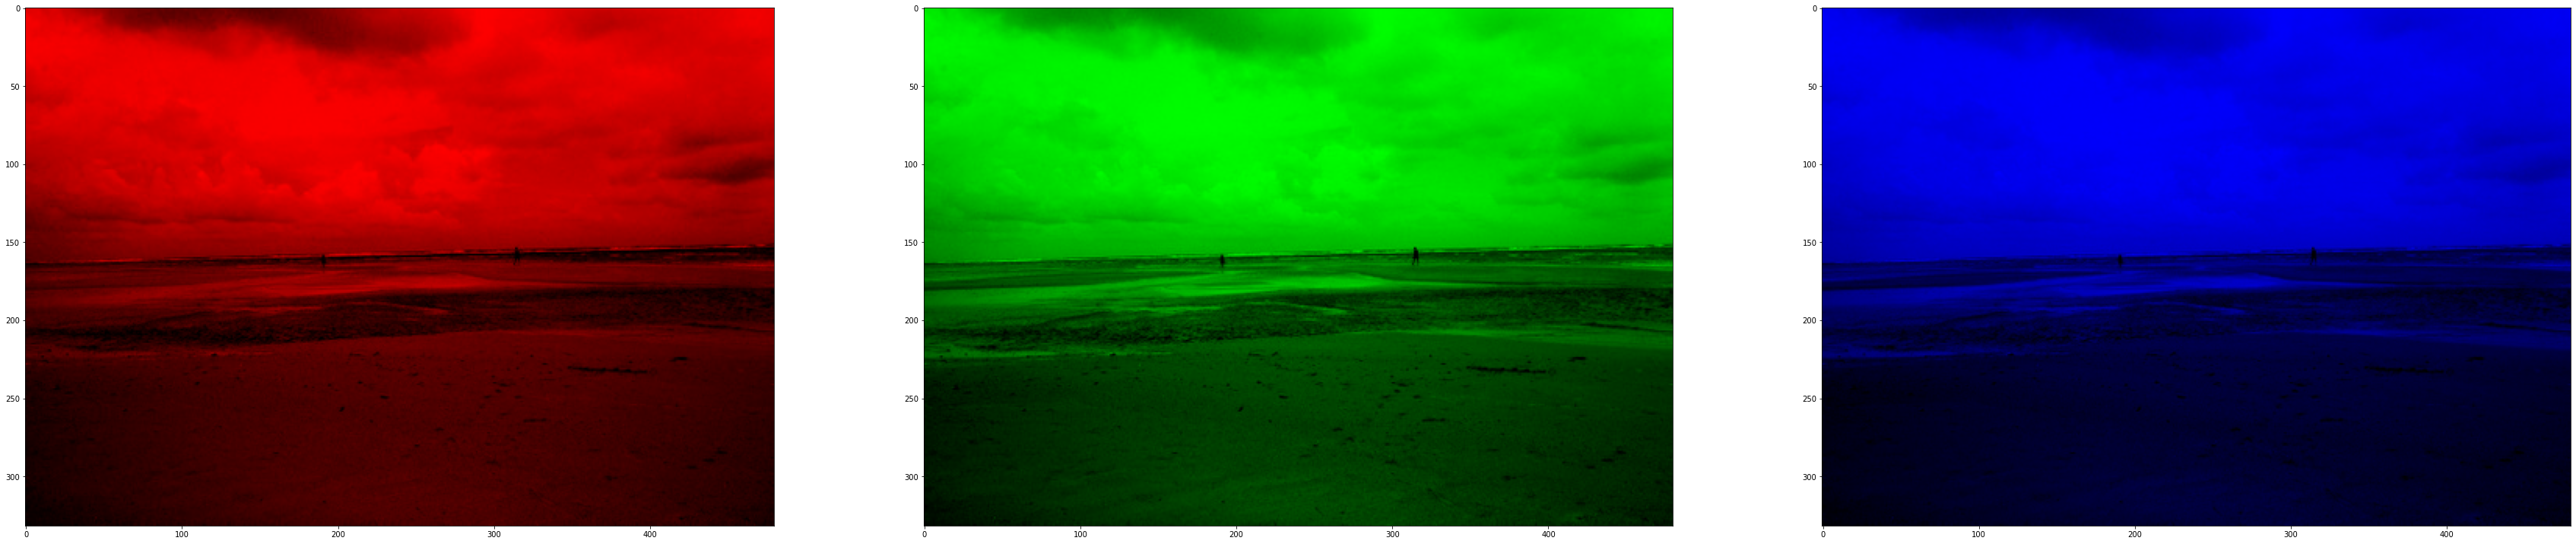

In [115]:
#show 3 kênh màu của ảnh 
def split(img):
  (B,G,R) = (img[:,:,2],img[:,:,1],img[:,:,0])                                  #slit ảnh ra 3 kênh màu gán vào 3 biến 
  return B,G,R
zeros = np.zeros((image_1.shape[:2]), dtype="uint8")                            #tạo ma trận zeros với size bằng size 2D của ảnh
B,G,R = split(image_1)

#dùng matplotlib để hiển thị ảnh từng kênh màu
fig, (ax1, ax2, ax3) = plt.subplots(1,3)                                        # khai báo subplot là 1-3 trong 1 figure - tức show được 3 tấm hình trên 1 hàng trong 1 figure
plt.rcParams["figure.figsize"] = (10,30)                                        #khai báo figure size
ax1.imshow(cv2.merge([R, zeros, zeros]))                                        #show ra ảnh với độ sáng kênh red = kênh red của ảnh đã lấy ở trên 
ax2.imshow(cv2.merge([zeros, G, zeros]))                                        #show ra ảnh với độ sáng kênh green = kênh green  của ảnh đã lấy ở trên 
ax3.imshow(cv2.merge([zeros,zeros, B]))                                         #show ra ảnh với độ sáng kênh blue = kênh blue của ảnh đã lấy ở trên 
plt.show(fig)

 # Create Gaussian Filter

**Gaussian Kernel**

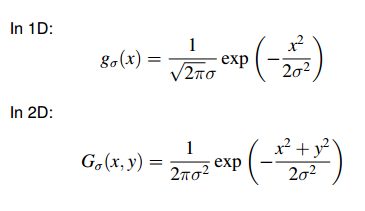

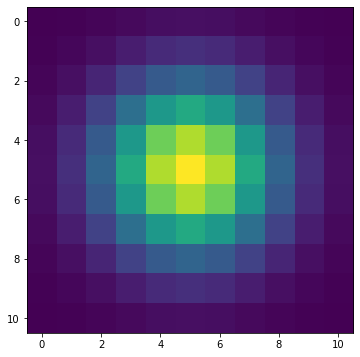

In [172]:
class kernel():
  def __init__(self,size):
    self.size = size                                                            #khai báo size của kernel
    self.empty_2D = np.zeros((size,size),dtype="float64")                       #khai báo ma trận 0 2D có kích thước sizexsize
  
  def gaussian(self,sigma):
    g = self.empty_2D                                                           #tạo ma trận 0 kích thước sizexsize
    center = int(self.size/2)                                                   #tính vị trí pixel tâm

    # quét hàng và cột để xét từng pixel 
    for row in range(g.shape[0]):
      for col in range(g.shape[1]):

        #nhập công thức phân phối gaussian 2D vào để tính giá trị cho pixel đang xét
        e = np.sqrt((row-center)**2 +(col-center)**2) 
        g[row,col] = np.exp(-e**2/(2*(sigma**2)))/(2*np.pi*(sigma**2))
    
    kernel = g/np.sum(g)                                                        #normalize lại filter để đảm bảo khi nhân conv với ảnh cho giá trị nằm trong 0-255
    return kernel

#test thử
gauss = kernel(11)                                                              #size 11x11
gaussian = gauss.gaussian(2)                                                    #sigma 2

#visualize gaussian kernel
plt.rcParams["figure.figsize"] = (6,6)
plt.imshow(gaussian)


**Padding Image**

Tạo hàm padding để thực hiện zero-padding tấm ảnh với kích thước phù hợp với size của kernel

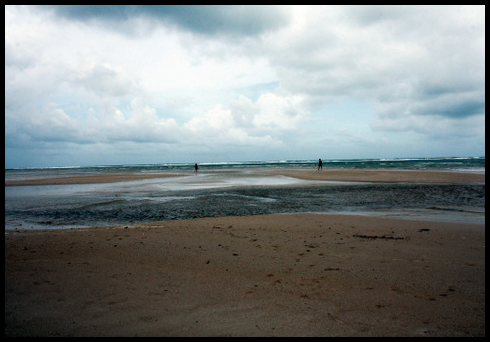

In [117]:
def padding(img,size):
  old_image_height, old_image_width, channels = img.shape                       #lấy kích thước ảnh HxWx3
  color = (0,0,0)                                                               #giá trị 3 kênh màu cho phần padding - zero padding nên là  (0,0,0)
  
  #tính lại kích thước mới sau khi padding
  new_image_width = size-1 + old_image_width                                    
  new_image_height = size-1 + old_image_height
  

  #sử dụng np.full để tạo ra một ma trận newHxnewWx3 mới với giá trị các pixel là 0.0 
  result = np.full((new_image_height,new_image_width, channels), color, dtype='float64')
  

  #tính gốc tọa độ đặt ảnh 
  x = (new_image_width - old_image_width) // 2
  y = (new_image_height - old_image_height) // 2
  

  #đặt tấm ảnh cũ lên ma trận mới tạo ra
  result[y:y+old_image_height, x:x+old_image_width] = img
  return result

size_kernel = gaussian.shape[0]                                                 #lấy size của k

#test thử
pad = padding(image,size_kernel)
cv2_imshow(pad)

**Convolution**

Hiện thực phép tích chập


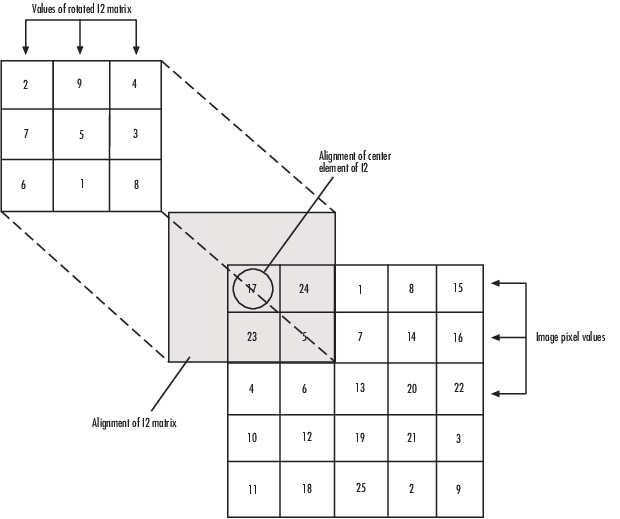

In [118]:
def conv(image_1channel, kernel, padding):                                      #đưa vào hàm này hình ảnh cần nhân conv, kernel và ảnh đã được padding
  
  conv_img = np.zeros((image_1channel.shape[0],image_1channel.shape[1]))        #tạo ma trận 0 với size bằng size của ảnh đưa vào, -> size của ảnh kết quả
  k = kernel.shape[0]                                                           #lấy size của kernel

  #flip kernel theo cả x và y trước khi nhân vào ma trận ảnh để đảm bảo đúng định nghĩa conv 
  kernel = np.flip(kernel)

  #quét từng hàng và cột để xét từng pixel
  for i in range(image_1channel.shape[0]):
    for j in range(image_1channel.shape[1]):

      #xét vùng ảnh mà kernel đang phủ lên
      mat = padding[i:i+k, j:j+k]

      #thực hiện phép nhân ma trận bình thường giữa kernel và vùng ảnh đang xét do kernel đã được flip
      conv_img[i,j] = np.sum(np.multiply(mat,kernel))

  return conv_img

#**Option: Blurring image**

nhân conv bức hình với kernel để blurring


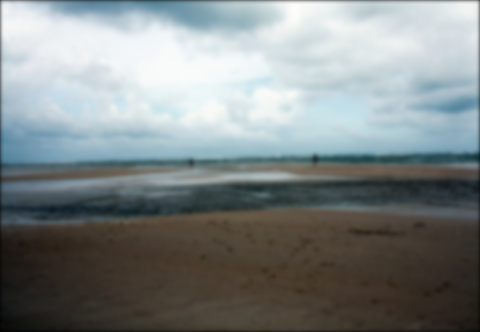

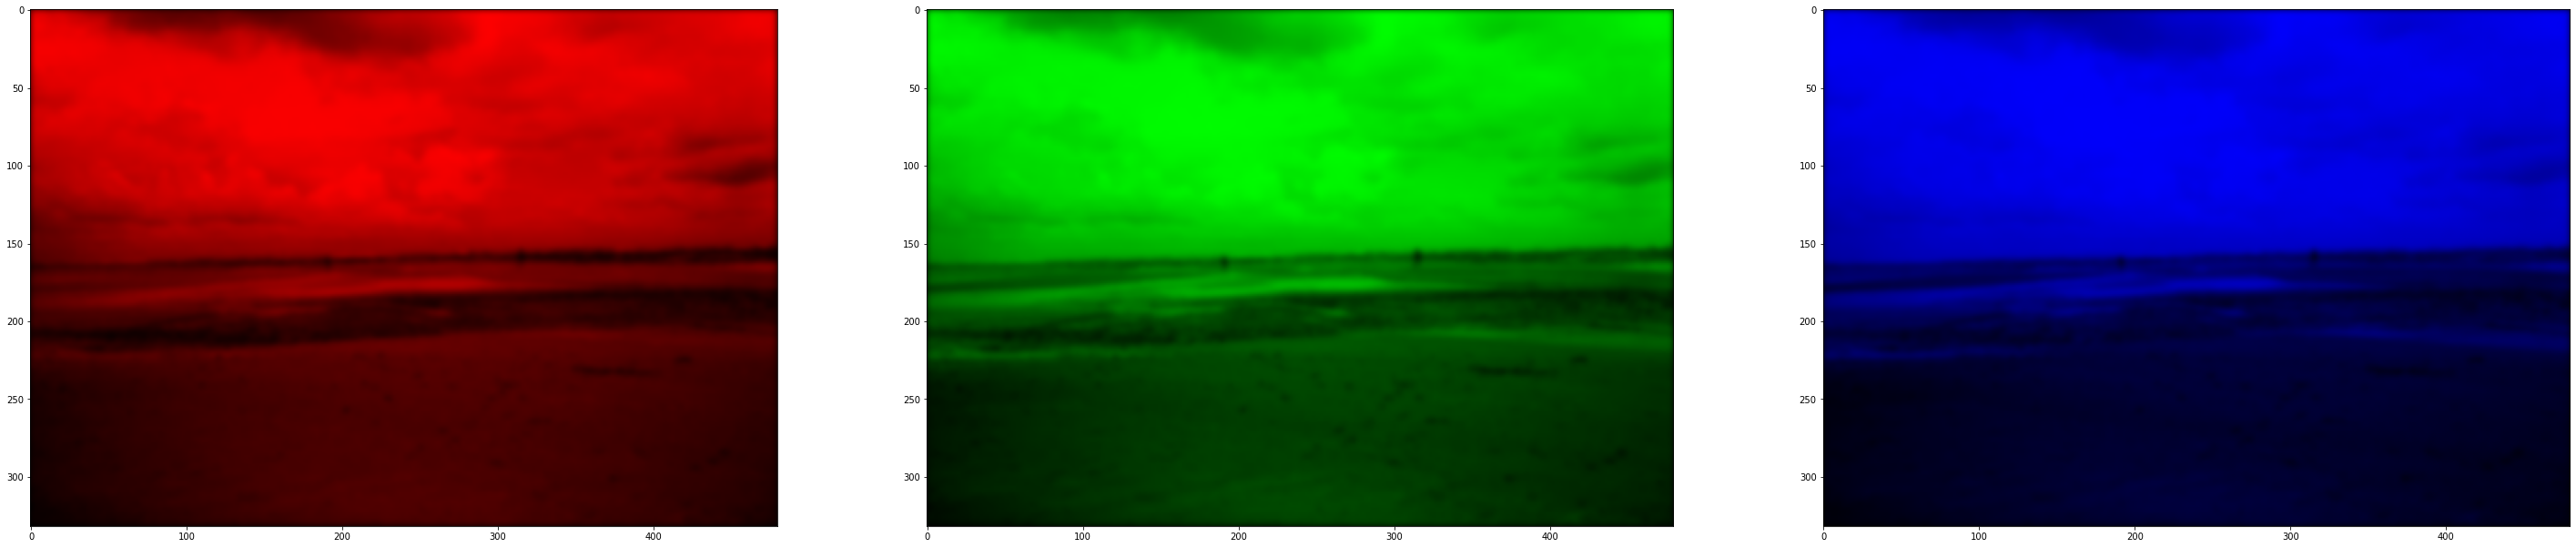

In [120]:
def GaussianBlur(image):

  zeros = np.zeros((image.shape[:2]), dtype="uint8")                            #tạo ma trận 0 3D size bằng size image nhập vào để chứa ảnh kết quả
  B,G,R = split(image)
  (padb, padg, padr) = split(padding(image, size_kernel))                       #padding image rồi split image ra 3 kênh màu
  
  #nhân conv mỗi kênh màu với gaussian kernel
  R_conv = conv(R,gaussian, padr).astype(zeros.dtype)                           #nhân xong thì ép kiểu về uint8 (0-255) để có thể hiển thị được, vì kernel là số float nên sau khi nhân conv thì kết quả là số float, phải ép kiểu
  G_conv = conv(G,gaussian, padg).astype(zeros.dtype)                           #tương tự
  B_conv = conv(B,gaussian, padb).astype(zeros.dtype)                           #tương tự
  


  #show kết quả
  fig, (ax1, ax2, ax3) = plt.subplots(1,3)
  plt.rcParams["figure.figsize"] = (10,30)
  ax1.imshow(cv2.merge((R_conv, zeros, zeros))) 
  ax2.imshow(cv2.merge((zeros, G_conv, zeros)))
  ax3.imshow(cv2.merge((zeros,zeros, B_conv)))
  image_result = cv2.merge((B_conv,G_conv,R_conv))
  cv2_imshow(image_result)
  plt.show(fig)
  return image_result
 
#test thử
test2 = GaussianBlur(image_1)

# **Canny Edge Detection**

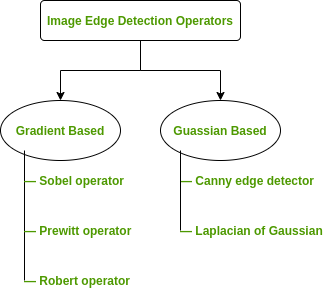

Convert ảnh RGB sang ảnh Binary

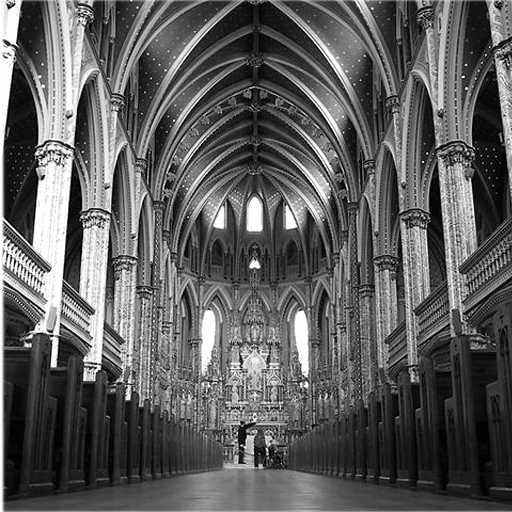

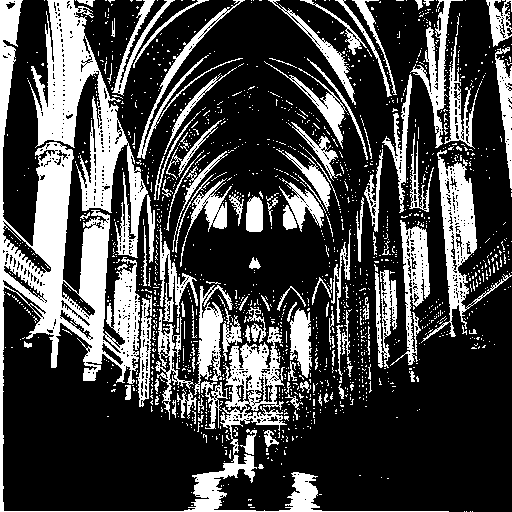

In [175]:
image = cv2.imread(os.path.join(folder_dir, "Church.jpg"))                      #đọc ảnh vào và lưu vào 1 biến
gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)                              #chuyển thành ảnh xám
cv2_imshow(gray_img)                                                            #show ảnh xám
(thresh, bw_img) = cv2.threshold(gray_img,127,255,cv2.THRESH_BINARY)            #chuyển thành ảnh binary, chọn mức threshold là 127
cv2_imshow(bw_img)                                                              #show ảnh binary


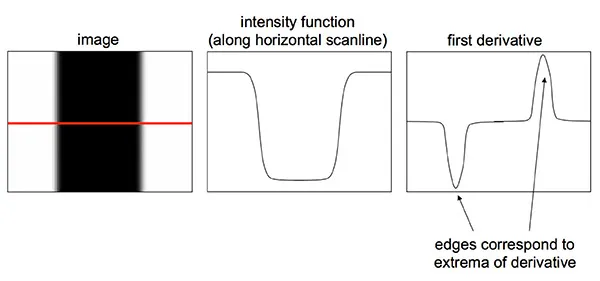

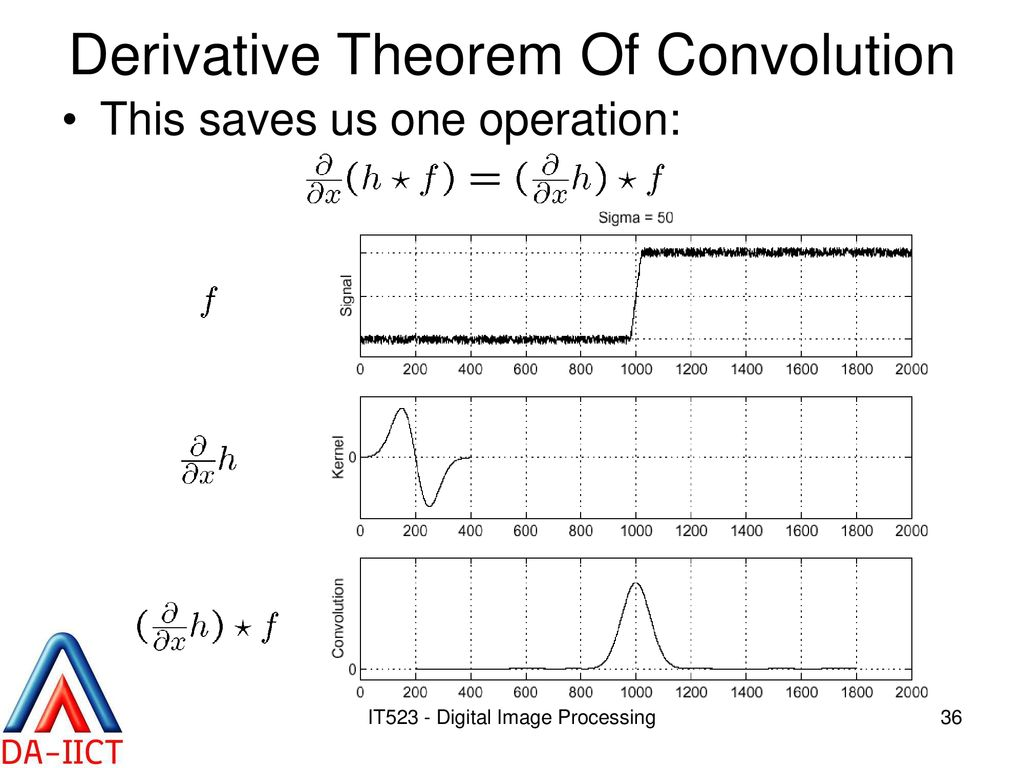

**Tính đạo hàm của ảnh bằng cách nhân ảnh với đạo hàm của bộ lọc gaussian 11x11, sigma = 2 đã hiện thực ở trên**

In [176]:
def normalize(x):
  return (x*255)/(np.max(x))
class deri_filter():
  def __init__(self):
    """self.sharpen = np.array((
	                      [0, -1, 0],
	                      [-1, 5, -1],
	                      [0, -1, 0]), dtype="int")
    self.laplacian = np.array((
	                      [0, 1, 0],
	                      [1, -4, 1],
	                      [0, 1, 0]), dtype="int")"""
    # Sobel x-axis kernel
    self.sobelX = np.array((
	                      [-1, 0, 1],
	                      [-2, 0, 2],
	                      [-1, 0, 1]), dtype="int")
    
    # Sobel y-axis kernel
    self.sobelY = np.array((
	                      [-1, -2, -1],
	                      [0, 0, 0],
	                      [1, 2, 1]), dtype="int")
    

    self.derivative_X = np.array([[1,0,-1]], dtype="int")                       #tạo kernel đạo hàm theo X (đã flip)
    self.derivative_Y = np.array([[1],[0],[-1]], dtype = "int")                 #tạo kernel đạo hàm theo Y (đã flip)

  def conv_deri(self, filter, kernel_deri, padding):                            #function nhân conv với kernel đạo hàm
    conv_filter = np.zeros((filter.shape))                                      #tạo ma trận 0 để chứa kết quả
    k0, k1  = kernel_deri.shape                                                 #lấy size của kernel_đạo hàm đưa vào
    if k0 > k1:                                                                 #check xem kernel đưa vào là kernel đạo hàm theo phương Y ?
      
      #quét hàng và cột để xét từng pixel
      for i in range(filter.shape[0]):                                          
        for j in range(filter.shape[1]):
          mat = padding[i:i+k0,j].reshape((3,1))                                #lấy vùng ảnh dọc theo cột j k0 pixel, ứng với khi đưa kernel đạo hàm theo phương Y và
          conv_filter[i,j] = np.sum(np.multiply(kernel_deri,mat))               #nhân kernel đạo hàm với ma trận đang xet để tính đạo hàm vùng ảnh hiện tạ
    
    elif k0 < k1:                                                               #check xem kernel đưa vào là kernel đạo hàm theo phương X ?
  
      #quét hàng và cột để xét từng pixel
      for i in range(filter.shape[0]):
        for j in range(filter.shape[1]):  
          mat = padding[i, j:j+k1].reshape((1,3))                               #lấy vùng ảnh ngang theo hàng i k1 pixel, ứng với khi đưa kernel đạo hàm theo phương X vào
          conv_filter[i,j] = np.sum(np.multiply(mat,kernel_deri))               #nhân ma trận vùng ảnh đang xét với kernel đạo hàm để tính đạo hàm ảnh hiện tại

    return conv_filter                                                          #trả ra kết quả


  def diff(self, img, kernel):                                                  #function áp bộ lọc đã được đạo hàm lên tấm ảnh
    
    #tạo một ma trận 3D của kernel với 3 kênh như nhau để có thể đưa vào hàm padding đã viết ở trên (vì hàm padding ở trên viết với input là ảnh 3 kênh, muốn tận dụng lại thì phải đưa đầu vô tương ứng)
    kernel = cv2.merge([kernel, kernel, kernel])                                
    pad_kernel = padding(kernel, 3)[:,:,0]                                      #padding xong thì trích lấy ma trận kênh 0 (kênh nào cũng như nhau, do tạo input hàm padding là ma trận 3 kênh như nhau)

    # tương tự ta cũng làm cho ảnh 1 kênh  để tận dụng lại hàm padding đã viết ở trên
    img = cv2.merge([img, img, img])
    pad = padding(img,kernel.shape[0])[:,:,0]
    
    #nhân convolution kernel cho kernel đạo hàm theo X và Y để tìm derivative của kernel
    conv_X = self.conv_deri(kernel[:,:,0], self.derivative_X, pad_kernel)
    conv_Y = self.conv_deri(kernel[:,:,0], self.derivative_Y, pad_kernel)

    #sau đó lại nhân conv ảnh với kernel đã được đạo hàm để tìm ra sự thay đổi về độ sáng theo các phương
    dX = conv(img,conv_X,pad)
    dY = conv(img,conv_Y,pad)

    #ma trận gradient magnitude của 2 giá trị theo phương X và Y
    image_mag = np.sqrt(dX**2+dY**2)
    #ma trận góc gradient tại từng pixel  
    angle = np.degrees(np.arctan2(dY,dX))

    #Xử lý để có thể hiển thị ra quan sát ảnh đạo hàm theo X và theo Y (dời về mức 0)
    dX1 = dX - np.min(dX)
    dY1 = dY - np.min(dY)
  
    #normalize về 0- 255
    dX1= normalize(dX1)
    dY1= normalize(dY1)
  
    image_X = np.round(dX1).astype(np.uint8)
    image_Y = np.round(dY1).astype(np.uint8)
    cv2_imshow(image_X)
    cv2_imshow(image_Y)



    #normalize ảnh magitude 0-255
    image_mag = ((image_mag*255)/np.max(image_mag)).astype(np.uint8)

    cv2_imshow(image_mag)
    return image_mag, angle,dX,dY



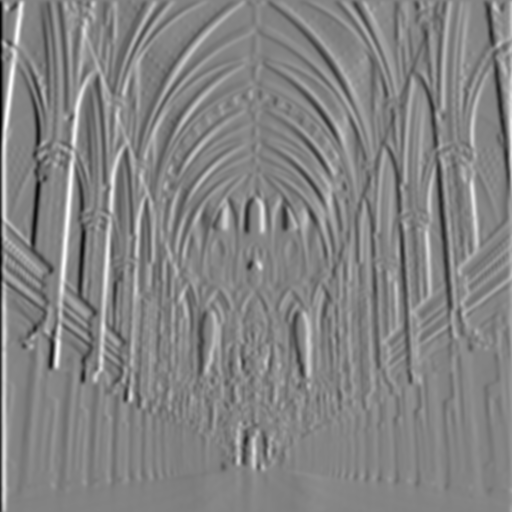

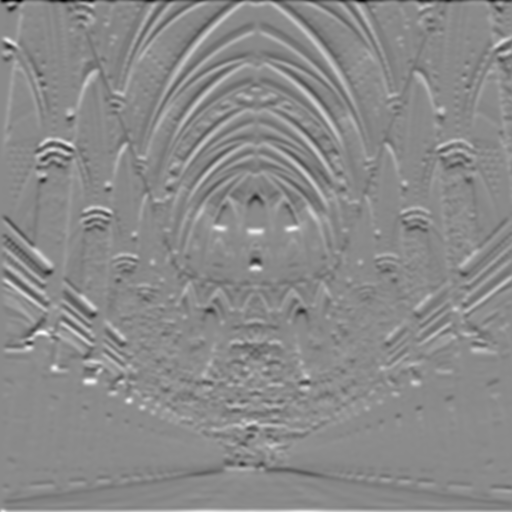

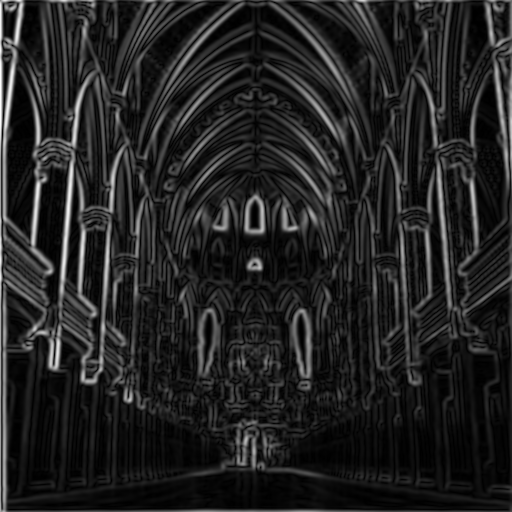

In [177]:
#test
test3 = deri_filter().diff(gray_img,gaussian)

So sánh với bộ lọc Sobel

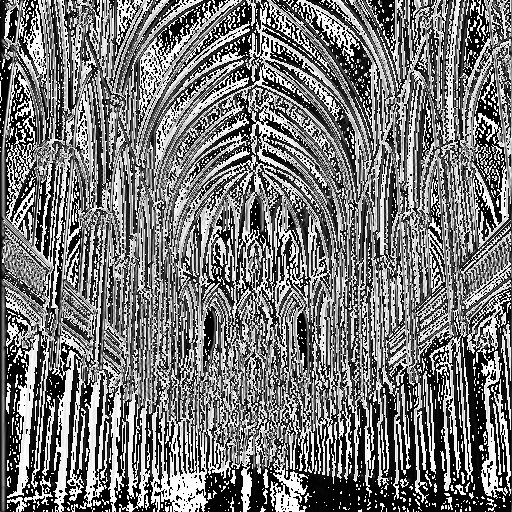

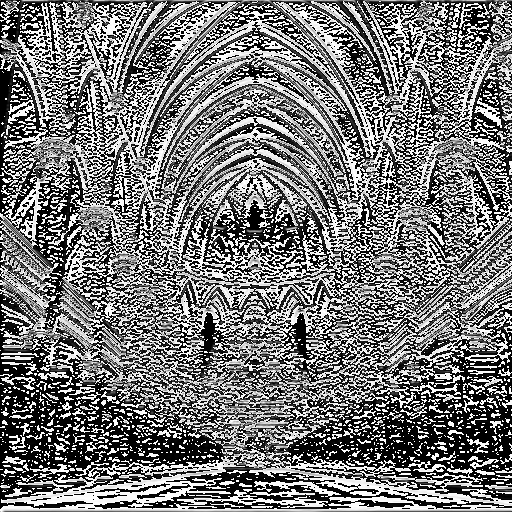

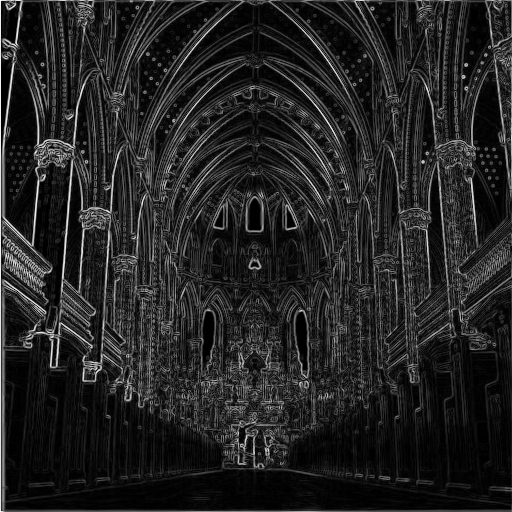

In [178]:
sobel_X = deri_filter().sobelX
sobel_Y = deri_filter().sobelY
gray_imgs = cv2.merge([gray_img, gray_img, gray_img])
pad4 = padding(gray_imgs,sobel_X.shape[0])[:,:,0]
test4 = conv(gray_img,sobel_X,pad4)
test5 = conv(gray_img,sobel_Y,pad4)
test6 = np.sqrt(test4**2+test5**2)

test4 = normalize(test4)
test5 = normalize(test5)
test6 = normalize(test6)

test4 = test4.astype(np.uint8)
cv2_imshow(test4)
test5 = test5.astype(np.uint8)
cv2_imshow(test5)
test6 = test6.astype(np.uint8)
cv2_imshow(test6)

Thử lại với bộ lọc gaussian 3x3 sigma 1

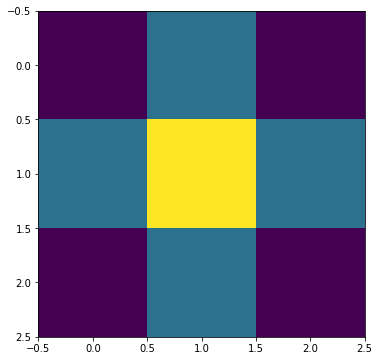

In [179]:
gauss = kernel(3)                                                              #size 3x3
gaussian = gauss.gaussian(1)
plt.rcParams["figure.figsize"] = (6,6)
plt.imshow(gaussian)

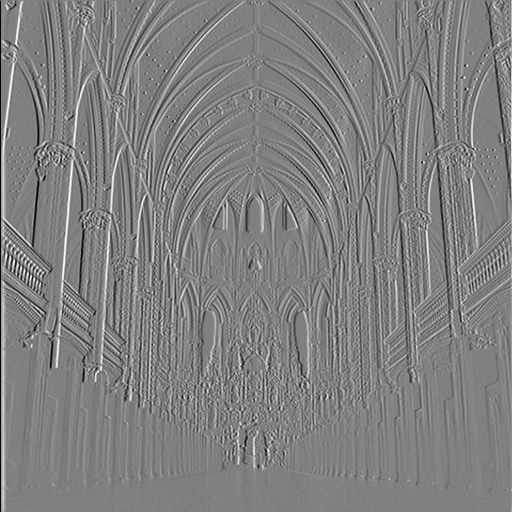

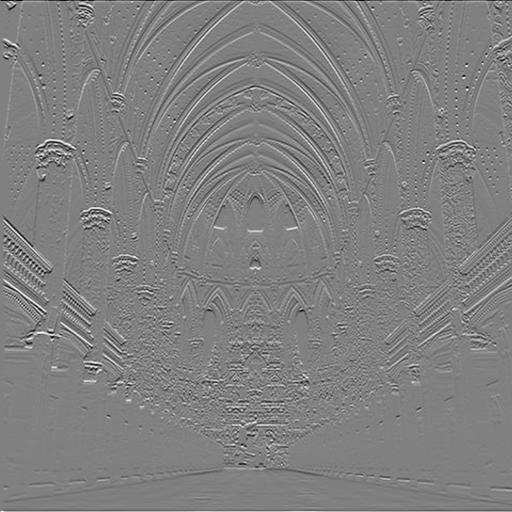

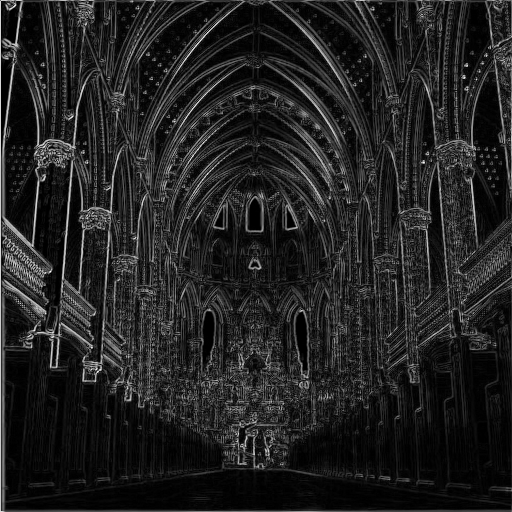

In [180]:
test7,theta,dX,dY = deri_filter().diff(gray_img,gaussian)

**Non-Maximum Suppression**

làm mỏng các cạnh về 1 pixel


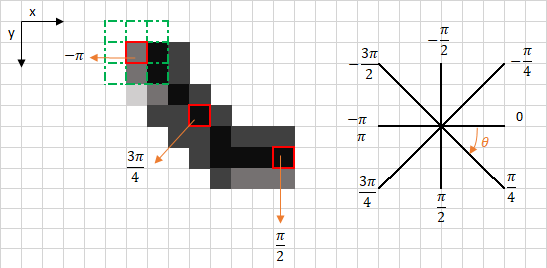

Cách thực hiện:

Dựa vào ma trận angle gradient tại mỗi pixel tính được từ bước trước, ta phân vùng không gian 2D xung quanh pixel đang xét thành 4 phần lần lượt là:
- từ 0 đến 45 độ và từ -135 đến -180 độ (vùng 1)
- từ 45 đến 90 độ và từ -90 đến -135 độ  (vùng 2)
- từ 90 đến 135 độ và từ -45 đến -90 độ  (vùng 3)
- từ 135 đến 180 độ và từ 0 đến -45 độ   (vùng 4)

Với mỗi pixel đang xét đến, ta sẽ xem giá trị angle tại vị trí đó nằm trong vùng nào trong 4 vùng trên, với mỗi vùng, ta sẽ chọn ra các pixel nhất định để so sánh độ lớn gradient với pixel trung tâm. Tuy nhiên, ở đây em sử dụng phép nội suy để tăng cường độ hiệu quả của thuật toán này (thay vì chỉ so sánh đơn thuần), vì thế ở mỗi vùng, em sẽ chọn 4 pixel để nội suy và so sánh thay vì chỉ 2 như thuật toán truyền thống

Cụ thể: 
Với giả sử pixel đang xét là **img[i][j]** , ta sẽ chọn:
- chọn pixel **img[i,j+1], img[i+1, j+1], img[i,j-1], img[i-1,j-1]** khi angle thuộc vùng 1
- chọn pixel **img[i+1,j] ,img[i+1,j+1], img[i-1,j] ,img[i-1,j-1]** khi angle thuộc vùng 2
- chọn pixel **img[i+1,j] ,img[i+1,j-1], img[i-1,j] ,img[i-1,j+1]** khi angle thuộc vùng 3
-  chọn pixel **img[i,j-1] ,img[i+1,j-1], img[i,j+1] ,img[i-1,j+1]** khi angle thuộc vùng 4

Sau đó thực hiện phép nội suy lại gradient pixel trung tâm và so sánh với giá trị hiện tại của pixel trung tâm.

ví dụ cho vùng 1:



```
if (img[i,j] >= ((img[i+1, j+1]-img[i,j+1])*GradientY[i,j]/img[i,j]+img[i,j+1]) and img[i,j] >= ((img[i-1,j-1]-img[i,j-1]))*GradientY[i,j]/img[i,j]+img[i,j-1]))):
                    NMS[i,j] = img[i,j]
                else:
                    NMS[i,j] = 0
```
Nếu pixel trung tâm đang xét lớn hơn các giá trị nội suy thì giữ lại (tương tự thuật toán truyền thống, pixel trung tâm đang xét lớn nhất so với xung quanh thì giữ lại), nếu nhỏ hơn thì cho về 0


Các vùng khác tương tự 

In [181]:
# làm mỏng cạnh xuống còn 1 pixel 
def NonMaxSupp(img, angle, Gx, Gy):
    
    NMS = np.zeros(img.shape)                                                   #tạo ma trận 0 để lưu kết quả xử lý
    
    #quét hàng và cột, bỏ hàng, cột đầu tiên và cuối cùng ko xét
    for i in range(1, int(img.shape[0]) - 1):
        for j in range(1, int(img.shape[1]) - 1):
            #vùng 1, thực hiện như đã trình bày
            if((angle[i,j] >= 0 and angle[i,j] <= 45) or (angle[i,j] < -135 and angle[i,j] >= -180)):
                yBot = np.array([img[i,j+1], img[i+1,j+1]])
                yTop = np.array([img[i,j-1], img[i-1,j-1]])
                x_est = np.abs(Gy[i,j]/img[i,j])
                if (img[i,j] >= ((yBot[1]-yBot[0])*x_est+yBot[0]) and img[i,j] >= ((yTop[1]-yTop[0])*x_est+yTop[0])):
                    NMS[i,j] = img[i,j]
                else:
                    NMS[i,j] = 0

            #vùng 2, tương tự
            if((angle[i,j] > 45 and angle[i,j] <= 90) or (angle[i,j] < -90 and angle[i,j] >= -135)):
                yBot = np.array([img[i+1,j] ,img[i+1,j+1]])
                yTop = np.array([img[i-1,j] ,img[i-1,j-1]])
                x_est = np.absolute(Gx[i,j]/img[i,j])
                if (img[i,j] >= ((yBot[1]-yBot[0])*x_est+yBot[0]) and img[i,j] >= ((yTop[1]-yTop[0])*x_est+yTop[0])):
                    NMS[i,j] = img[i,j]
                else:
                    NMS[i,j] = 0
            # vùng 3, tương tự
            if((angle[i,j] > 90 and angle[i,j] <= 135) or (angle[i,j] < -45 and angle[i,j] >= -90)):
                yBot = np.array([img[i+1,j] ,img[i+1,j-1]])
                yTop = np.array([img[i-1,j] ,img[i-1,j+1]])
                x_est = np.absolute(Gx[i,j]/img[i,j])
                if (img[i,j] >= ((yBot[1]-yBot[0])*x_est+yBot[0]) and img[i,j] >= ((yTop[1]-yTop[0])*x_est+yTop[0])):
                    NMS[i,j] = img[i,j]
                else:
                    NMS[i,j] = 0

            #vùng 4, tương t
            if((angle[i,j] > 135 and angle[i,j] <= 180) or (angle[i,j] < 0 and angle[i,j] >= -45)):
                yBot = np.array([img[i,j-1] ,img[i+1,j-1]])
                yTop = np.array([img[i,j+1] ,img[i-1,j+1]])
                x_est = np.absolute(Gy[i,j]/img[i,j])
                if (img[i,j] >= ((yBot[1]-yBot[0])*x_est+yBot[0]) and img[i,j] >= ((yTop[1]-yTop[0])*x_est+yTop[0])):
                    NMS[i,j] = img[i,j]
                else:
                    NMS[i,j] = 0
    
    return NMS
                

**Kết quả**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: overflow encountered in ubyte_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in ubyte_scalars
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in ubyte_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in ubyte_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in double_scalars
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in double_scalars

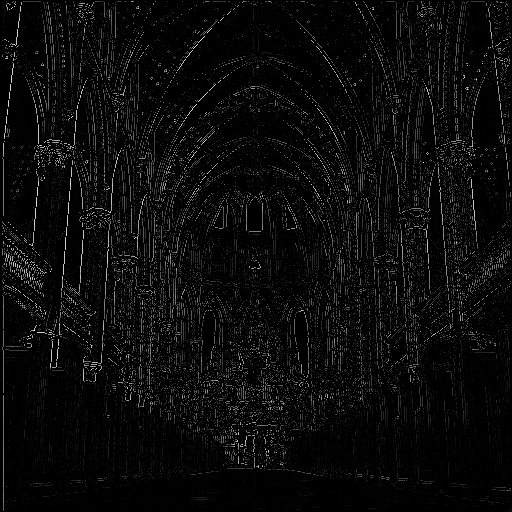

In [182]:
NMS = NonMaxSupp(test7, theta, dX, dY)
NMS = normalize(NMS).astype(np.uint8)
cv2_imshow(NMS)

Tới đây ta thu được tấm hình rất nhiều nhiễu, các pixel bị rời rạc nhau, vì vậy cần làm thêm bước linking cũng như loại bỏ bớt các pixel ko cần thiết


**Double Thresholding - Hysteresis**

Cách làm:
Thiết lập 2 ngưỡng high and low
- Các pixel có cường độ vượt qua ngưỡng cao là pixel mạnh (strong)
- Các pixel có cường độ nằm giữa 2 ngưỡng cao và thấp là pixel yếu (weak)
- Các pixel có cường độ nằm dưới ngưỡng thấp là pixel không liên quan (non-relevant)

Ở đây em thiết lập ngưỡng cao bằng cách chọn tỷ số cao rồi nhân cho pixel có cường độ lớn nhất, với ngưỡng thấp, em cũng chọn tỷ số thấp rồi nhân cho giá trị của ngưỡng cao

Với các pixel weak, nếu có các pixel xung quanh là strong pixel thì set pixel đó lên mức cao, nếu không thì giữ nguyên là weak pixel

Cuối cùng sử dụng vòng lặp để lặp cho đến khi tìm ra hết tất cả các cạnh yếu ko có liên kết với cạnh mạnh, và loại bỏ đi để có hình ảnh cuối cùng.




In [183]:
def Hyst(img):
    highThresholdRatio = 0.2                                                    #tỷ số ngưỡng cao  (so với pixel cao nhất)
    lowThresholdRatio = 0.15                                                    #tỷ số ngưỡng thấp  (so với ngưỡng cao) - tức = 0.15 ngưỡng cao
    G = np.copy(img)                                                            #copy img truyền vào sang biến khác để xử lý
    h,w = G.shape                                                               #lấy size ảnh                                                      
    highThreshold = np.max(G) * highThresholdRatio                              #set ngưỡng cao
    lowThreshold = highThreshold * lowThresholdRatio                            #set ngưỡng thấp
    
    
    x = 0.1                                                                     #tạo giá trị để khởi tạo vòng lặp 
    oldx=0                                                                      
    
    # Sử dụng vòng lặp để tạo tìm cho đến hết các cạnh yếu
    while(oldx != x):
        oldx = x
        #quét hàng và cột ma trận ảnh- bỏ cặp hàng, cột đầu tiên và cuối cùng
        for i in range(1,h-1):
            for j in range(1,w-1):
                if(G[i,j] > highThreshold):                                     #nếu pixel hiện tại lớn hơn ngưỡng cao thì set = 1
                    G[i,j] = 255
                elif(G[i,j] < lowThreshold):
                    G[i,j] = 0                                                  #nếu pixel hiện tại nhỏ hơn ngưỡng thấp thì set = 0

                else:                                                           #trường hợp ở giữa ngưỡng cao và thấp (weak-pixel) thì
                    if((G[i-1,j-1] > highThreshold) or                          #xét các pixel xung quanh pixel trung tâm đang xét, 
                        (G[i-1,j] > highThreshold) or                           #nếu có pixel nào lớn hơn ngưỡng cao thì cho pixel trung tâm lên 1 => weak -> strong
                        (G[i-1,j+1] > highThreshold) or                         #còn nếu ko có pixel nào lớn hơn ngưỡng cao xung qunah thì giữ nguyên weak pixel, dịch pixel trung tâm, lặp lại 
                        (G[i,j-1] > highThreshold) or
                        (G[i,j+1] > highThreshold) or
                        (G[i+1,j-1] > highThreshold) or
                        (G[i+1,j] > highThreshold) or
                        (G[i+1,j+1] > highThreshold)):
                        G[i,j] = 255

        #sau khi quét hết img, vẫn sẽ còn những cạnh yếu ko kết nối với các cạnh strong -> remove đi 
        x = np.sum(G == 255)                                                    #đếm tất cả các pixel 255 trong G

    G = (G == 255) * G                                                          #xóa những pixel khác 255, giữ lại pixel 255
    return G

In [184]:
Final_Image = Hyst(NMS)

**Thành Quả**

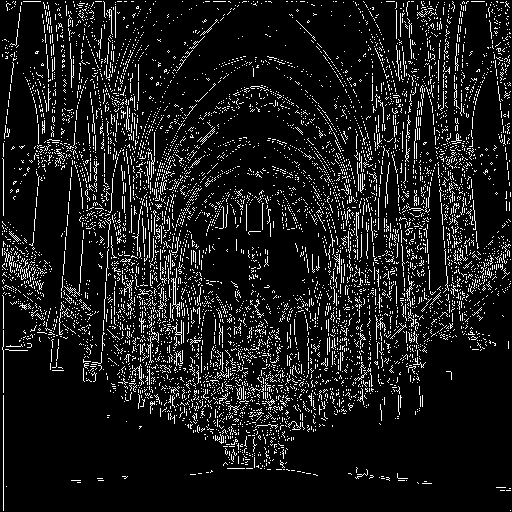

In [185]:
cv2_imshow(Final_Image)                                                         #kết quả cuối cùng